In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.cluster import KMeans

In [76]:
testArr = ['GE','CAT','RTX','UNP','HON','BA','DE','ETN','LMT','UPS','RELX','PH','WM','MMM','TT','CTAS','ITW','TRI', 'TDG','CP','EMR','NOC','GD','RSG','CNI','FDX','CSX','CARR','PCAR','NSC','CPRT','GWW','JCI','HWM','AXON']
masterArr = []
names = []
for x in testArr:
    data = yf.Ticker(x)
    try:
        masterArr.append([data.info['priceToBook'],data.info['trailingPE']])
        names.append(x)
    except:
        masterArr.append([np.nan,np.nan])
masterArr = np.array(masterArr)
print(masterArr)

[[ 12.021332   34.480263 ]
 [  8.762445   15.972776 ]
 [  2.761189   35.712677 ]
 [  9.094602   22.4287   ]
 [  7.6587715  23.537313 ]
 [        nan         nan]
 [  5.653747   18.586584 ]
 [  6.406053   32.58465  ]
 [ 14.4870205  19.801523 ]
 [  5.7818036  16.927408 ]
 [ 29.837587   41.483868 ]
 [  7.227306   28.010735 ]
 [ 11.438632   33.441174 ]
 [ 17.464804   20.505508 ]
 [ 10.728567   31.83627  ]
 [ 19.199589   49.30361  ]
 [ 22.29818    21.884615 ]
 [  6.6648984  36.26392  ]
 [        nan         nan]
 [  1.6461585  27.90681  ]
 [  3.2810647  35.070423 ]
 [  4.655389   16.608818 ]
 [  3.003394   18.45301  ]
 [  6.236049   35.702873 ]
 [  3.3165293  20.90224  ]
 [  2.3263743  16.782747 ]
 [  4.9097686  18.39106  ]
 [  3.8861055  52.131145 ]
 [  2.8963485  13.051899 ]
 [  4.167173   21.926598 ]
 [  7.554076   41.272728 ]
 [ 14.287602   26.524265 ]
 [  3.6793816  41.79812  ]
 [ 11.724484   49.265385 ]
 [ 24.097975  172.30052  ]]


In [77]:
masterArr = masterArr[~np.isnan(masterArr)]

In [78]:
masterArr = masterArr.reshape(-1,2)
print(masterArr)

[[ 12.021332   34.480263 ]
 [  8.762445   15.972776 ]
 [  2.761189   35.712677 ]
 [  9.094602   22.4287   ]
 [  7.6587715  23.537313 ]
 [  5.653747   18.586584 ]
 [  6.406053   32.58465  ]
 [ 14.4870205  19.801523 ]
 [  5.7818036  16.927408 ]
 [ 29.837587   41.483868 ]
 [  7.227306   28.010735 ]
 [ 11.438632   33.441174 ]
 [ 17.464804   20.505508 ]
 [ 10.728567   31.83627  ]
 [ 19.199589   49.30361  ]
 [ 22.29818    21.884615 ]
 [  6.6648984  36.26392  ]
 [  1.6461585  27.90681  ]
 [  3.2810647  35.070423 ]
 [  4.655389   16.608818 ]
 [  3.003394   18.45301  ]
 [  6.236049   35.702873 ]
 [  3.3165293  20.90224  ]
 [  2.3263743  16.782747 ]
 [  4.9097686  18.39106  ]
 [  3.8861055  52.131145 ]
 [  2.8963485  13.051899 ]
 [  4.167173   21.926598 ]
 [  7.554076   41.272728 ]
 [ 14.287602   26.524265 ]
 [  3.6793816  41.79812  ]
 [ 11.724484   49.265385 ]
 [ 24.097975  172.30052  ]]


In [79]:
kmeans = KMeans(n_clusters=5).fit_predict(masterArr[:,:2])


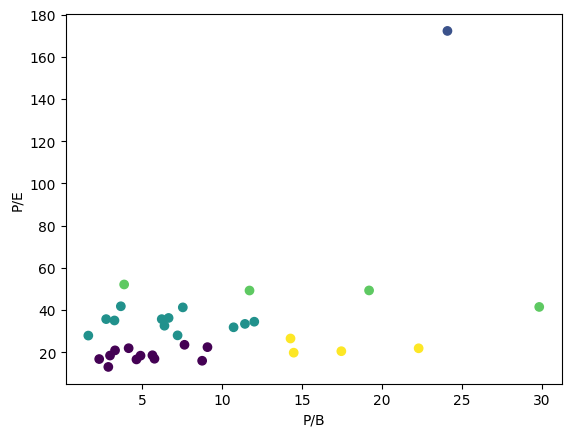

In [80]:
plt.scatter(masterArr[:,0], masterArr[:,1], c=kmeans)
plt.xlabel('P/B')
plt.ylabel('P/E')
plt.show()

In [81]:
print(masterArr,names)

[[ 12.021332   34.480263 ]
 [  8.762445   15.972776 ]
 [  2.761189   35.712677 ]
 [  9.094602   22.4287   ]
 [  7.6587715  23.537313 ]
 [  5.653747   18.586584 ]
 [  6.406053   32.58465  ]
 [ 14.4870205  19.801523 ]
 [  5.7818036  16.927408 ]
 [ 29.837587   41.483868 ]
 [  7.227306   28.010735 ]
 [ 11.438632   33.441174 ]
 [ 17.464804   20.505508 ]
 [ 10.728567   31.83627  ]
 [ 19.199589   49.30361  ]
 [ 22.29818    21.884615 ]
 [  6.6648984  36.26392  ]
 [  1.6461585  27.90681  ]
 [  3.2810647  35.070423 ]
 [  4.655389   16.608818 ]
 [  3.003394   18.45301  ]
 [  6.236049   35.702873 ]
 [  3.3165293  20.90224  ]
 [  2.3263743  16.782747 ]
 [  4.9097686  18.39106  ]
 [  3.8861055  52.131145 ]
 [  2.8963485  13.051899 ]
 [  4.167173   21.926598 ]
 [  7.554076   41.272728 ]
 [ 14.287602   26.524265 ]
 [  3.6793816  41.79812  ]
 [ 11.724484   49.265385 ]
 [ 24.097975  172.30052  ]] ['GE', 'CAT', 'RTX', 'UNP', 'HON', 'DE', 'ETN', 'LMT', 'UPS', 'RELX', 'PH', 'WM', 'MMM', 'TT', 'CTAS', 'ITW'